In [1]:
import sys
sys.path.append('/scratch/rpradata/PressureEv/Simulations')

from Turbcopy.p3d import p3d

import numpy as np

import matplotlib.pyplot as plt

from numpy import newaxis as nna

from scipy.stats import norm

import matplotlib.mlab as mlab

import h5py




In [2]:
import pandas as pd

In [3]:
tslice = 1
datalink = '/archive/tulasi/149p6_rs/'


# dt = 0.6/120 = 0.005 * tomega_c

#Riddhi's 2021 PoP energy dissipation in turbulent reconnection

In [4]:
#EDIT 
component = "xz" #xz, yx, yz, zx, zy
part = 'ion'

In [5]:
rc = p3d(datalink, '000')
rc.vars2load(['prim'])
rc.loadslice(tslice)


In [6]:
dx = rc.dx
dy = rc.dy
dz = 0
dt = 0.005


In [23]:
# print(rc.dx)

0.03651484375


In [7]:
def load_p_ion(tslice, datalink): #tsloce and link ues p3d from turbcopy
    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    
    Pe_xx = rc.pixx.squeeze()
    Pe_xy = rc.pixy.squeeze()
    Pe_xz = rc.pixz.squeeze()
    Pe_yy = rc.piyy.squeeze()
    Pe_yz = rc.piyz.squeeze()
    Pe_zz = rc.pizz.squeeze()

    ny, nx = Pe_xx.shape #x and y here corresponding to the "spatial" coordinate. these will apply to all P_ij
    Pe_tensor = np.zeros((ny, nx, 3, 3)) #3 and 3 for axis 0 and 1.

    Pe_tensor[:, :, 0, 0] = Pe_xx  # P_xx
    Pe_tensor[:, :, 0, 1] = Pe_xy  # P_xy
    Pe_tensor[:, :, 0, 2] = Pe_xz  # P_xz

    Pe_tensor[:, :, 1, 0] = Pe_xy  # P_yx = P_xy
    Pe_tensor[:, :, 1, 1] = Pe_yy  # P_yy
    Pe_tensor[:, :, 1, 2] = Pe_yz  # P_yz

    Pe_tensor[:, :, 2, 0] = Pe_xz  # P_zx = P_xz
    Pe_tensor[:, :, 2, 1] = Pe_yz  # P_zy = P_yz
    Pe_tensor[:, :, 2, 2] = Pe_zz  # P_zz

    return Pe_tensor

In [8]:
def dqdx(q_comp, dx): #q is (N,N); if necessary, squeeze it first. This is for one component of the tensor, i.e. xx
    val = (np.roll(q_comp, -1, axis=0) - np.roll(q_comp, 1, axis=0)) / (2 * dx)
    return val

def dqdy(q_comp, dy):
    val = (np.roll(q_comp, -1, axis = 1) - np.roll(q_comp, 1, axis = 1))/(2*dy)
    return val

def dqdz(q_comp, dz):
    nx = ny = q_comp.shape[0]
    if dz != 0:
        val = (np.roll(q_comp, -1, axis = 2) - np.roll(q_comp, 1, axis = 2))/(2*dz)
    else:
        val = np.zeros((nx, ny))
    return val

In [12]:
# #want to try averaging; do a save

import h5py
# import numpy as np

# N = 120  # number of timesteps (change if needed)
# ny, nx = 4096, 4096

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/ion-terms/rhlh_terms_ion_yx.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/ion-terms/rhlh_terms_ion_yz.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)


# with h5py.File("/scratch/rpradata/PressureEv/Simulations/ion-terms/rhlh_terms_ion_xz.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/ion-terms/rhlh_terms_ion_zx.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/ion-terms/rhlh_terms_ion_zy.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

############***************

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/electron-terms/rhlh_terms_elec_yz.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/electron-terms/rhlh_terms_elec_zx.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)

# with h5py.File("/scratch/rpradata/PressureEv/Simulations/electron-terms/rhlh_terms_elec_zy.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)



#DONE

In [8]:
def p_ev_rh_ion_tot_append(tdown, tup, save_dir, datalink, dx, dy): #BWP, comp, DP

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])

    for ts_idx, ts in enumerate(range(tdown, tup)): 
        rc.loadslice(ts)

        Pe_xx = rc.pixx.squeeze()
        Pe_xy = rc.pixy.squeeze()
        Pe_xz = rc.pixz.squeeze()
        Pe_yy = rc.piyy.squeeze()
        Pe_yz = rc.piyz.squeeze()
        Pe_zz = rc.pizz.squeeze()

        ny, nx = Pe_xx.shape #x and y here corresponding to the "spatial" coordinate. these will apply to all P_ij
        Pe_tensor = np.zeros((ny, nx, 3, 3)) #3 and 3 for axis 0 and 1.

        Pe_tensor[:, :, 0, 0] = Pe_xx  # P_xx
        Pe_tensor[:, :, 0, 1] = Pe_xy  # P_xy
        Pe_tensor[:, :, 0, 2] = Pe_xz  # P_xz

        Pe_tensor[:, :, 1, 0] = Pe_xy  # P_yx = P_xy
        Pe_tensor[:, :, 1, 1] = Pe_yy  # P_yy
        Pe_tensor[:, :, 1, 2] = Pe_yz  # P_yz

        Pe_tensor[:, :, 2, 0] = Pe_xz  # P_zx = P_xz
        Pe_tensor[:, :, 2, 1] = Pe_yz  # P_zy = P_yz
        Pe_tensor[:, :, 2, 2] = Pe_zz  # P_zz

        nx, ny = Pe_xx.shape

    #from load_u:

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

    #return u

    #from def load_b:

        bx = rc.bx
        by = rc.by
        bz = rc.bz

        B_field = np.concatenate((bx, by, bz), axis=-1)

    # #return B_field


    # #from def: Bquants

        B_mag = np.linalg.norm(B_field, axis=-1, keepdims=True)  # shape (nx, ny, 1)

        bx = B_field[:,:,0]
        by = B_field[:,:,1]
        bz = B_field[:,:,2]
    
    # Bmagx = np.linalg.norm(bx)
    # Bmagy = np.linalg.norm(by)
    # Bmagz = np.linalg.norm(bz)

        Bux = bx/(B_mag.squeeze())
        Buy = by/(B_mag.squeeze())
        Buz = bz/(B_mag.squeeze())

    # B_field = np.stack((bx, by, bz), axis=-1)          # shape (nx, ny, 3)
    # B_mag = np.linalg.norm(B_field, axis=-1, keepdims=True)
    # B_unit = B_field / B_mag                           # elementwise division

        B_unit = np.stack((Bux, Buy, Buz), axis=-1)
        omega_c = B_mag

    # return B_unit, B_mag (aka omega here)

# from def compute_W(u, dx, dy, nx, ny)

        W = np.zeros((nx, ny, 3, 3)) #already assume this shape
        for i in range(3):
            for j in range(3):
  
                if i == j:
                    continue


                if i == 0:  # d/dx
                    duj_dxi = (np.roll(u[:, :, j], -1, axis=0) - np.roll(u[:, :, j], 1, axis=0)) / (2 * dx)
                elif i == 1:  # d/dy
                    duj_dxi = (np.roll(u[:, :, j], -1, axis=1) - np.roll(u[:, :, j], 1, axis=1)) / (2 * dy)
                else:  # d/dz not available → set to 0
                    duj_dxi = 0


                if j == 0:  # d/dx
                    dui_dxj = (np.roll(u[:, :, i], -1, axis=0) - np.roll(u[:, :, i], 1, axis=0)) / (2 * dx)
                elif j == 1:  # d/dy
                    dui_dxj = (np.roll(u[:, :, i], -1, axis=1) - np.roll(u[:, :, i], 1, axis=1)) / (2 * dy)
                else:  # d/dz not available → set to 0
                    dui_dxj = 0

                W[:, :, i, j] = 0.5 * (duj_dxi - dui_dxj)
    # return W

# from def compute_B(nx, ny, omega, B_unit):

        B = np.zeros((nx, ny, 3, 3))

        for i in range(3):
            for j in range(3):
                for k in range(3):
            #Levi-Civita
                    epsilon = (
                        1 if (i, j, k) in [(0, 1, 2), (1, 2, 0), (2, 0, 1)]
                        else -1 if (i, j, k) in [(2, 1, 0), (0, 2, 1), (1, 0, 2)]
                        else 0
                    )
                    B[:, :, i, j] += omega_c[:, :, 0] * epsilon * B_unit[:, :, k] #omega is cyclotron freq
    # return B

# from def compute_BWP(B_field, Pe_tensor, u, nx, ny, dx, dy):
    # W = compute_W(u, dx, dy, nx, ny)
    # B_unit, omega_c_e = Bquants(B_field)
    # B = compute_B(nx, ny, omega_c_e, B_unit)
        BW = B + W
        BWP = np.matmul(BW, Pe_tensor) - np.matmul(Pe_tensor, BW)

    ###
    ###

# return BWP
    # from def compute_c(u, nx, ny, dx, dy):
        ux = u[:,:,0]
        uy = u[:,:,1]
        uz = u[:,:,2]

        dudx = (np.roll(ux, -1, axis=0) - np.roll(ux, 1, axis=0)) / (2 * dx)
        dudy = (np.roll(uy, -1, axis=1) - np.roll(uy, 1, axis=1)) / (2 * dy)

        C = -(1/3)*(dudx+dudy)

    # return C
    #compression term
        comp_term = np.zeros((ny, nx, 3, 3)) #3 and 3 for axis 0 and 1.
        comp_term[:,:,0,0] = 5*C*Pe_xx #xx
    
        comp_term[:, :, 0, 1] = 5*C*Pe_xy  
        comp_term[:, :, 0, 2] = 5*C*Pe_xz 

        comp_term[:, :, 1, 0] = 5*C*Pe_xy  
        comp_term[:, :, 1, 1] = 5*C*Pe_yy  
        comp_term[:, :, 1, 2] = 5*C*Pe_yz  

        comp_term[:, :, 2, 0] = 5*C*Pe_xz  
        comp_term[:, :, 2, 1] = 5*C*Pe_yz 
        comp_term[:, :, 2, 2] = 5*C*Pe_zz 

    #return comp_term

    ###
    ###

# from def compute_DP(u, C, Pe_tensor, nx, ny, dx, dy):
        D_raw = np.zeros((nx, ny, 3, 3))

        for i in range(3):
            for j in range(3):

                if i == j:
                    continue

                if i == 0:  # d/dx
                    duj_dxi = (np.roll(u[:, :, j], -1, axis=0) - np.roll(u[:, :, j], 1, axis=0)) / (2 * dx)
                elif i == 1:  # d/dy
                    duj_dxi = (np.roll(u[:, :, j], -1, axis=1) - np.roll(u[:, :, j], 1, axis=1)) / (2 * dy)
                else:  # d/dz not available → set to 0
                    duj_dxi = 0


                if j == 0:  # d/dx
                    dui_dxj = (np.roll(u[:, :, i], -1, axis=0) - np.roll(u[:, :, i], 1, axis=0)) / (2 * dx)
                elif j == 1:  # d/dy
                    dui_dxj = (np.roll(u[:, :, i], -1, axis=1) - np.roll(u[:, :, i], 1, axis=1)) / (2 * dy)
                else:  # d/dz not available → set to 0
                    dui_dxj = 0

                D_raw[:,:,i,j] = 0.5 * (duj_dxi + dui_dxj)

        D = np.zeros((nx, ny, 3, 3))
        for i in range(2):
            for j in range(3):
                delta = 1 if i == j else 0
                D[:, :, i, j] = D_raw[:, :, i, j] + C * delta

        DP = np.matmul(D, Pe_tensor) + np.matmul(Pe_tensor, D)

    # return DP

    ###
    ###
  
    # return BWP[:,:,0,0] + comp_term[:,:,0,0] + DP[:,:,0,0]

    #HARDCODING
    # for ts_idx, ts in enumerate(range(0, tup)): 
        with h5py.File("%s/rhlh_terms_ion_yx.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["BWP"][ts, :, :]  = BWP[:,:,1,0].astype('float32')
            f["DP"][ts, :, :]   = DP[:,:,1,0].astype('float32')
            f["comp"][ts, :, :] = comp_term[:,:,1,0].astype('float32')

        with h5py.File("%s/rhlh_terms_ion_yz.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT

            f["BWP"][ts, :, :]  = BWP[:,:,1,2].astype('float32')
            f["DP"][ts, :, :]   = DP[:,:,1,2].astype('float32')
            f["comp"][ts, :, :] = comp_term[:,:,1,2].astype('float32')

        # print(f"Saved timestep {ts_idx} for ts={ts}")

        with h5py.File("%s/rhlh_terms_ion_xz.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["BWP"][ts, :, :]  = BWP[:,:,0,2].astype('float32')
            f["DP"][ts, :, :]   = DP[:,:,0,2].astype('float32')
            f["comp"][ts, :, :] = comp_term[:,:,0,2].astype('float32')

        with h5py.File("%s/rhlh_terms_ion_zy.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["BWP"][ts, :, :]  = BWP[:,:,2,1].astype('float32')
            f["DP"][ts, :, :]   = DP[:,:,2,1].astype('float32')
            f["comp"][ts, :, :] = comp_term[:,:,2,1].astype('float32')

        with h5py.File("%s/rhlh_terms_ion_zx.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["BWP"][ts, :, :]  = BWP[:,:,2,0].astype('float32')
            f["DP"][ts, :, :]   = DP[:,:,2,0].astype('float32')
            f["comp"][ts, :, :] = comp_term[:,:,2,0].astype('float32')


        print(f"Saved for ts={ts}")
    
    # return BWP[:,:,0,0], comp_term[:,:,0,0], DP[:,:,0,0]

    



In [37]:
#TRY SAVING ALL THIS FIRST

# p_ev_rh_elec_tot_append(0, 3, "/scratch/rpradata/PressureEv/Simulations/electron-terms", datalink, dx, dy)

In [9]:
def p_ev_lh_ion_tot_append(tdown, tup, save_dir, datalink, dx, dy, dt):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    
    for ts_idx, ts in enumerate(range(tdown, tup)): 
        rc.loadslice(ts)

        Pexx = rc.pixy.squeeze()
        nx, ny = Pexx.shape

        dPdx = dqdx(Pexx, dx)
        dPdy = dqdy(Pexx, dy)
        dPdz = dqdz(Pexx, dz)

        dPdn = np.zeros((nx, ny, 3))
        dPdn[:,:,0] = dPdx
        dPdn[:,:,1] = dPdy
        dPdn[:,:,2] = dPdz

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

        conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 

        with h5py.File("%s/rhlh_terms_ion_yx.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["conv"][ts, :, :] = conv.astype('float32')
            
        Pexx = rc.piyz.squeeze()
        nx, ny = Pexx.shape

        dPdx = dqdx(Pexx, dx)
        dPdy = dqdy(Pexx, dy)
        dPdz = dqdz(Pexx, dz)

        dPdn = np.zeros((nx, ny, 3))
        dPdn[:,:,0] = dPdx
        dPdn[:,:,1] = dPdy
        dPdn[:,:,2] = dPdz

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

        conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 


        with h5py.File("%s/rhlh_terms_ion_yz.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["conv"][ts, :, :] = conv.astype('float32')

        # print(f"Saved timestep {ts_idx} for ts={ts}")

        Pexx = rc.pixz.squeeze()
        nx, ny = Pexx.shape

        dPdx = dqdx(Pexx, dx)
        dPdy = dqdy(Pexx, dy)
        dPdz = dqdz(Pexx, dz)

        dPdn = np.zeros((nx, ny, 3))
        dPdn[:,:,0] = dPdx
        dPdn[:,:,1] = dPdy
        dPdn[:,:,2] = dPdz

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

        conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 

        
        with h5py.File("%s/rhlh_terms_ion_xz.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["conv"][ts, :, :] = conv.astype('float32')

        Pexx = rc.piyz.squeeze()
        nx, ny = Pexx.shape

        dPdx = dqdx(Pexx, dx)
        dPdy = dqdy(Pexx, dy)
        dPdz = dqdz(Pexx, dz)

        dPdn = np.zeros((nx, ny, 3))
        dPdn[:,:,0] = dPdx
        dPdn[:,:,1] = dPdy
        dPdn[:,:,2] = dPdz

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

        conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 

        with h5py.File("%s/rhlh_terms_ion_zy.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["conv"][ts, :, :] = conv.astype('float32')

 
        Pexx = rc.pixz.squeeze()
        nx, ny = Pexx.shape

        dPdx = dqdx(Pexx, dx)
        dPdy = dqdy(Pexx, dy)
        dPdz = dqdz(Pexx, dz)

        dPdn = np.zeros((nx, ny, 3))
        dPdn[:,:,0] = dPdx
        dPdn[:,:,1] = dPdy
        dPdn[:,:,2] = dPdz

        ux = (rc.jix/rc.ni).squeeze() #negative for electrons
        uy = (rc.jiy/rc.ni).squeeze()
        uz = (rc.jiz/rc.ni).squeeze()

        u = np.zeros((nx, ny, 3))
        u[:,:,0] = ux
        u[:,:,1] = uy
        u[:,:,2] = uz

        conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 

        with h5py.File("%s/rhlh_terms_ion_zx.h5" % (save_dir), "a") as f:  # "a" = append/update mode ##EDIT
            f["conv"][ts, :, :] = conv.astype('float32')


        print(f"Saved for ts={ts}")
    


In [10]:
#RH

# p_ev_rh_ion_tot_append(3, 120, "/scratch/rpradata/PressureEv/Simulations/ion-terms", datalink, dx, dy)

#LH

p_ev_lh_ion_tot_append(3, 120, "/scratch/rpradata/PressureEv/Simulations/ion-terms", datalink, dx, dy, dt)

Saved for ts=3
Saved for ts=4
Saved for ts=5
Saved for ts=6
Saved for ts=7
Saved for ts=8
Saved for ts=9
Saved for ts=10
Saved for ts=11
Saved for ts=12
Saved for ts=13
Saved for ts=14
Saved for ts=15
Saved for ts=16
Saved for ts=17
Saved for ts=18
Saved for ts=19
Saved for ts=20
Saved for ts=21
Saved for ts=22
Saved for ts=23
Saved for ts=24
Saved for ts=25
Saved for ts=26
Saved for ts=27
Saved for ts=28
Saved for ts=29
Saved for ts=30
Saved for ts=31
Saved for ts=32
Saved for ts=33
Saved for ts=34
Saved for ts=35
Saved for ts=36
Saved for ts=37
Saved for ts=38
Saved for ts=39
Saved for ts=40
Saved for ts=41
Saved for ts=42
Saved for ts=43
Saved for ts=44
Saved for ts=45
Saved for ts=46
Saved for ts=47
Saved for ts=48
Saved for ts=49
Saved for ts=50
Saved for ts=51
Saved for ts=52
Saved for ts=53
Saved for ts=54
Saved for ts=55
Saved for ts=56
Saved for ts=57
Saved for ts=58
Saved for ts=59
Saved for ts=60
Saved for ts=61
Saved for ts=62
Saved for ts=63
Saved for ts=64
Saved for ts=65

<function matplotlib.pyplot.show(close=None, block=None)>

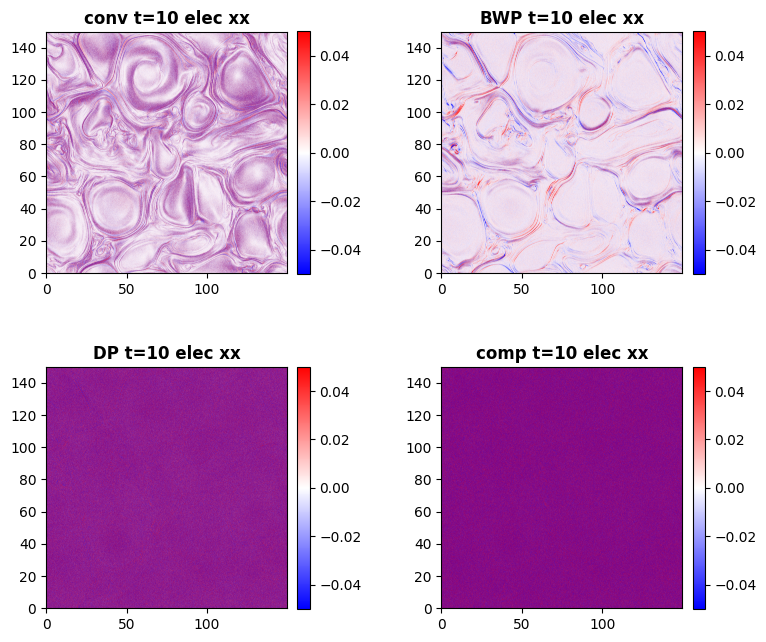

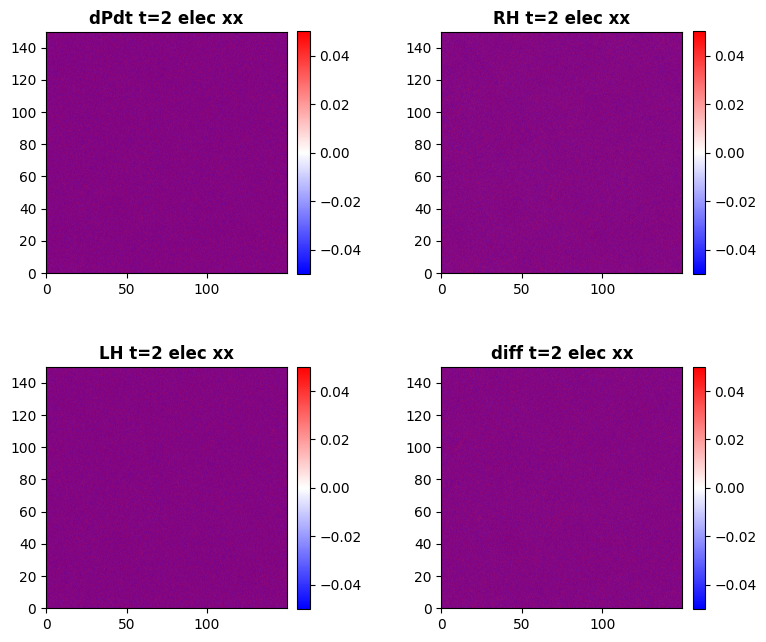

In [ ]:
#check!

t = 2

with h5py.File("/scratch/rpradata/PressureEv/Simulations/electron-terms/rhlh_terms_elec_yy.h5", "r") as f:
    # read full array at timestep 10
    conv10 = f["conv"][t, :, :]
    BWP10 = f["BWP"][t, :, :]
    DP10 = f["DP"][t, :, :]
    comp10 = f["comp"][t, :, :]
    



Pfxxt = load_p_ion(t+1, datalink)[:,:,1,1] #EDIT based on component
Pixxt = load_p_ion(t-1, datalink)[:,:,1,1] #EDIT based on component

dPdt10 = (Pfxxt - Pixxt) / (2*dt)


tft = dt * t
tit = dt * (t-1)

RH10 = BWP10 + DP10 + comp10
LH10 = dPdt10 + conv10
diff10 = RH10-LH10

fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(conv10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('conv t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(BWP10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('BWP t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(DP10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('DP t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(comp10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('comp t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show


fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(dPdt10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('dPdt t=%s %s %s' % (t, part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(RH10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('RH t=%s %s %s' % (t, part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(LH10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('LH t=%s %s %s' % (t, part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(diff10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('diff t=%s %s %s' % (t, part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show

In [12]:
def p_ev_lh_elec_totxx(tslice, datalink, dx, dy, dt): #dpdt, conv #conv already in just xx

# from def compute_dpdt(tslice, datalink, dt):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    # Pe_tensor_bef = load_p_ion(tslice-1, datalink)
    # Pe_tensor_af = load_p_ion(tslice+1, datalink)

    # dPdt = (Pe_tensor_af - Pe_tensor_bef)/(2*dt)
    # dPedt = (Pe_tensor_af - Pe_tensor_bef)

    

    # return dPdt
    Pe = load_p_elec(tslice, datalink)
    Pexx = Pe[:,:,0,0]
    nx, ny = Pexx.shape

    
    dPdx = dqdx(Pexx, dx)
    dPdy = dqdy(Pexx, dy)

    dPdz = dqdz(Pexx, dz)

    dPdn = np.zeros((nx, ny, 3))
    dPdn[:,:,0] = dPdx
    dPdn[:,:,1] = dPdy
    dPdn[:,:,2] = dPdz

    ux = -(rc.jex/rc.ne).squeeze() #negative for electrons
    uy = -(rc.jey/rc.ne).squeeze()
    uz = -(rc.jez/rc.ne).squeeze()

    u = np.zeros((nx, ny, 3))
    u[:,:,0] = ux
    u[:,:,1] = uy
    u[:,:,2] = uz

    conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 
    
    # return dPdt[:,:,0,0] + conv
    return conv

def p_ev_lh_elec_totyy(tslice, datalink, dx, dy, dt): #dpdt, conv #conv already in just xx

# from def compute_dpdt(tslice, datalink, dt):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    # Pe_tensor_bef = load_p_ion(tslice-1, datalink)
    # Pe_tensor_af = load_p_ion(tslice+1, datalink)

    # dPdt = (Pe_tensor_af - Pe_tensor_bef)/(2*dt)
    # dPedt = (Pe_tensor_af - Pe_tensor_bef)

    

    # return dPdt
    Pe = load_p_elec(tslice, datalink)
    Pexx = Pe[:,:,1,1]
    nx, ny = Pexx.shape

    
    dPdx = dqdx(Pexx, dx)
    dPdy = dqdy(Pexx, dy)

    dPdz = dqdz(Pexx, dz)

    dPdn = np.zeros((nx, ny, 3))
    dPdn[:,:,0] = dPdx
    dPdn[:,:,1] = dPdy
    dPdn[:,:,2] = dPdz

    ux = -(rc.jex/rc.ne).squeeze() #negative for electrons
    uy = -(rc.jey/rc.ne).squeeze()
    uz = -(rc.jez/rc.ne).squeeze()

    u = np.zeros((nx, ny, 3))
    u[:,:,0] = ux
    u[:,:,1] = uy
    u[:,:,2] = uz

    conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 
    
    # return dPdt[:,:,0,0] + conv
    return conv

def p_ev_lh_elec_totzz(tslice, datalink, dx, dy, dt): #dpdt, conv #conv already in just xx

# from def compute_dpdt(tslice, datalink, dt):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    # Pe_tensor_bef = load_p_ion(tslice-1, datalink)
    # Pe_tensor_af = load_p_ion(tslice+1, datalink)

    # dPdt = (Pe_tensor_af - Pe_tensor_bef)/(2*dt)
    # dPedt = (Pe_tensor_af - Pe_tensor_bef)

    

    # return dPdt
    Pe = load_p_elec(tslice, datalink)
    Pexx = Pe[:,:,2,2]
    nx, ny = Pexx.shape

    
    dPdx = dqdx(Pexx, dx)
    dPdy = dqdy(Pexx, dy)

    dPdz = dqdz(Pexx, dz)

    dPdn = np.zeros((nx, ny, 3))
    dPdn[:,:,0] = dPdx
    dPdn[:,:,1] = dPdy
    dPdn[:,:,2] = dPdz

    ux = -(rc.jex/rc.ne).squeeze() #negative for electrons
    uy = -(rc.jey/rc.ne).squeeze()
    uz = -(rc.jez/rc.ne).squeeze()

    u = np.zeros((nx, ny, 3))
    u[:,:,0] = ux
    u[:,:,1] = uy
    u[:,:,2] = uz

    conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 
    
    # return dPdt[:,:,0,0] + conv
    return conv
    
    

In [13]:
def p_ev_lh_elec_totxy(tslice, datalink, dx, dy, dt): #dpdt, conv #conv already in just xx

# from def compute_dpdt(tslice, datalink, dt):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    # Pe_tensor_bef = load_p_ion(tslice-1, datalink)
    # Pe_tensor_af = load_p_ion(tslice+1, datalink)

    # dPdt = (Pe_tensor_af - Pe_tensor_bef)/(2*dt)
    # dPedt = (Pe_tensor_af - Pe_tensor_bef)

    

    # return dPdt
    Pe = load_p_elec(tslice, datalink)
    Pexx = Pe[:,:,0,1]
    nx, ny = Pexx.shape

    
    dPdx = dqdx(Pexx, dx)
    dPdy = dqdy(Pexx, dy)

    dPdz = dqdz(Pexx, dz)

    dPdn = np.zeros((nx, ny, 3))
    dPdn[:,:,0] = dPdx
    dPdn[:,:,1] = dPdy
    dPdn[:,:,2] = dPdz

    ux = -(rc.jex/rc.ne).squeeze() #negative for electrons
    uy = -(rc.jey/rc.ne).squeeze()
    uz = -(rc.jez/rc.ne).squeeze()

    u = np.zeros((nx, ny, 3))
    u[:,:,0] = ux
    u[:,:,1] = uy
    u[:,:,2] = uz

    conv = u[:,:,0] * dPdn[:,:,0] + u[:,:,1]*dPdn[:,:,1] + u[:,:,2] * dPdn[:,:,2] 
    
    # return dPdt[:,:,0,0] + conv
    return conv

In [14]:
# # rhlh = pd.DataFrame(columns=['RH', 'LH'])
# rhlh_terms = pd.DataFrame({'conv':[], 'BWP':[], 'DP':[], 'comp':[]})
# print(rhlh_terms)
#just for one component

# rhlh.loc[len(rhlh)] = [3, 'C']

# print(rhlh)

#instead of using df, use hdf5

# import h5py
# import numpy as np

# N = 119  # number of timesteps (change if needed)
# ny, nx = 4096, 4096

# with h5py.File("rhlh_terms_elec_yy.h5", "w") as f: ## EDIT
#     f.create_dataset("conv", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("DP",   (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)
#     f.create_dataset("comp", (N, ny, nx), dtype='float32',
#                      chunks=(1, 256, 256), compression="gzip", compression_opts=4)


In [32]:
#the tot fns above are just for one components

In [15]:
# import h5py

# with h5py.File("rhlh_terms_elec_xx.h5", "a") as f:  # "a" = append/update mode ##EDIT
#     for ts_idx, ts in enumerate(range(0, 120)):  
#         BWP, DP, comp = p_ev_rh_elec_totzz(ts, datalink, dx, dy) ## EDIT !!!
#         conv = p_ev_lh_elec_totzz(ts, datalink, dx, dy, dt) ## EDIT !!!

#         f["conv"][ts_idx, :, :] = conv.astype('float32')
#         f["BWP"][ts_idx, :, :]  = BWP.astype('float32')
#         f["DP"][ts_idx, :, :]   = DP.astype('float32')
#         f["comp"][ts_idx, :, :] = comp.astype('float32')

#         print(f"Saved timestep {ts_idx} for ts={ts}")


        #CHANGE NAME OF THE H5PY ACCORDINGLY


Saved timestep 0 for ts=0
Saved timestep 1 for ts=1
Saved timestep 2 for ts=2
Saved timestep 3 for ts=3
Saved timestep 4 for ts=4
Saved timestep 5 for ts=5
Saved timestep 6 for ts=6
Saved timestep 7 for ts=7
Saved timestep 8 for ts=8
Saved timestep 9 for ts=9
Saved timestep 10 for ts=10
Saved timestep 11 for ts=11
Saved timestep 12 for ts=12
Saved timestep 13 for ts=13
Saved timestep 14 for ts=14
Saved timestep 15 for ts=15
Saved timestep 16 for ts=16
Saved timestep 17 for ts=17
Saved timestep 18 for ts=18
Saved timestep 19 for ts=19
Saved timestep 20 for ts=20
Saved timestep 21 for ts=21
Saved timestep 22 for ts=22
Saved timestep 23 for ts=23
Saved timestep 24 for ts=24
Saved timestep 25 for ts=25
Saved timestep 26 for ts=26
Saved timestep 27 for ts=27
Saved timestep 28 for ts=28
Saved timestep 29 for ts=29
Saved timestep 30 for ts=30
Saved timestep 31 for ts=31
Saved timestep 32 for ts=32
Saved timestep 33 for ts=33
Saved timestep 34 for ts=34
Saved timestep 35 for ts=35
Saved timest

IndexError: Index (119) out of range for (0-118)

In [30]:
#JUST CORRECTING THE BWP...

def fix_bwp_elec(tslice, datalink, dx, dy):

    rc = p3d(datalink, '000')
    rc.vars2load(['prim'])
    rc.loadslice(tslice)

    
    Pe_xx = rc.pexx.squeeze()
    Pe_xy = rc.pexy.squeeze()
    Pe_xz = rc.pexz.squeeze()
    Pe_yy = rc.peyy.squeeze()
    Pe_yz = rc.peyz.squeeze()
    Pe_zz = rc.pezz.squeeze()

    ny, nx = Pe_xx.shape #x and y here corresponding to the "spatial" coordinate. these will apply to all P_ij
    Pe_tensor = np.zeros((ny, nx, 3, 3)) #3 and 3 for axis 0 and 1.

    Pe_tensor[:, :, 0, 0] = Pe_xx  # P_xx
    Pe_tensor[:, :, 0, 1] = Pe_xy  # P_xy
    Pe_tensor[:, :, 0, 2] = Pe_xz  # P_xz

    Pe_tensor[:, :, 1, 0] = Pe_xy  # P_yx = P_xy
    Pe_tensor[:, :, 1, 1] = Pe_yy  # P_yy
    Pe_tensor[:, :, 1, 2] = Pe_yz  # P_yz

    Pe_tensor[:, :, 2, 0] = Pe_xz  # P_zx = P_xz
    Pe_tensor[:, :, 2, 1] = Pe_yz  # P_zy = P_yz
    Pe_tensor[:, :, 2, 2] = Pe_zz  # P_zz

    nx, ny = Pe_xx.shape

    #from load_u:

    ux = -(rc.jex/rc.ne).squeeze() #negative for electrons
    uy = -(rc.jey/rc.ne).squeeze()
    uz = -(rc.jez/rc.ne).squeeze()

    u = np.zeros((nx, ny, 3))
    u[:,:,0] = ux
    u[:,:,1] = uy
    u[:,:,2] = uz


    bx = rc.bx
    by = rc.by
    bz = rc.bz

    B_field = np.concatenate((bx, by, bz), axis=-1)

    # #return B_field


    # #from def: Bquants

    B_mag = np.linalg.norm(B_field, axis=-1, keepdims=True)  # shape (nx, ny, 1)

    bx = B_field[:,:,0]
    by = B_field[:,:,1]
    bz = B_field[:,:,2]
    
    # Bmagx = np.linalg.norm(bx)
    # Bmagy = np.linalg.norm(by)
    # Bmagz = np.linalg.norm(bz)

    Bux = bx/(B_mag.squeeze())
    Buy = by/(B_mag.squeeze())
    Buz = bz/(B_mag.squeeze())

    # B_field = np.stack((bx, by, bz), axis=-1)          # shape (nx, ny, 3)
    # B_mag = np.linalg.norm(B_field, axis=-1, keepdims=True)
    # B_unit = B_field / B_mag                           # elementwise division

    B_unit = np.stack((Bux, Buy, Buz), axis=-1)
    omega_c = B_mag

    W = np.zeros((nx, ny, 3, 3)) #already assume this shape
    for i in range(3):
        for j in range(3):
  
            if i == j:
                continue


            if i == 0:  # d/dx
                duj_dxi = (np.roll(u[:, :, j], -1, axis=0) - np.roll(u[:, :, j], 1, axis=0)) / (2 * dx)
            elif i == 1:  # d/dy
                duj_dxi = (np.roll(u[:, :, j], -1, axis=1) - np.roll(u[:, :, j], 1, axis=1)) / (2 * dy)
            else:  # d/dz not available → set to 0
                duj_dxi = 0


            if j == 0:  # d/dx
                dui_dxj = (np.roll(u[:, :, i], -1, axis=0) - np.roll(u[:, :, i], 1, axis=0)) / (2 * dx)
            elif j == 1:  # d/dy
                dui_dxj = (np.roll(u[:, :, i], -1, axis=1) - np.roll(u[:, :, i], 1, axis=1)) / (2 * dy)
            else:  # d/dz not available → set to 0
                dui_dxj = 0

            W[:, :, i, j] = 0.5 * (duj_dxi - dui_dxj)
    # return W

# from def compute_B(nx, ny, omega, B_unit):

    B = np.zeros((nx, ny, 3, 3))

    for i in range(3):
        for j in range(3):
            for k in range(3):
            #Levi-Civita
                epsilon = (
                    1 if (i, j, k) in [(0, 1, 2), (1, 2, 0), (2, 0, 1)]
                    else -1 if (i, j, k) in [(2, 1, 0), (0, 2, 1), (1, 0, 2)]
                    else 0
                )
                # print(omega_c.shape, B_unit.shape)
                B[:, :, i, j] += omega_c[:, :, 0] * epsilon * B_unit[:, :, k] #omega is cyclotron freq
    # return B

# from def compute_BWP(B_field, Pe_tensor, u, nx, ny, dx, dy):
    # W = compute_W(u, dx, dy, nx, ny)
    # B_unit, omega_c_e = Bquants(B_field)
    # B = compute_B(nx, ny, omega_c_e, B_unit)
    BW = B + W
    BWP = np.matmul(BW, Pe_tensor) - np.matmul(Pe_tensor, BW)

    return BWP[:,:,0,0]


In [17]:
N = 121  # number of timesteps (change if needed)
ny, nx = 4096, 4096

with h5py.File("fix_bwp_elec_xx.h5", "w") as f: ## EDIT
    f.create_dataset("BWP fixed", (N, ny, nx), dtype='float32',
                     chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    # f.create_dataset("BWP",  (N, ny, nx), dtype='float32',
    #                  chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    # f.create_dataset("DP",   (N, ny, nx), dtype='float32',
    #                  chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    # f.create_dataset("comp", (N, ny, nx), dtype='float32',
    #                  chunks=(1, 256, 256), compression="gzip", compression_opts=4)


In [31]:
with h5py.File("fix_bwp_elec_xx.h5", "a") as f:  # "a" = append/update mode ##EDIT
    for ts_idx, ts in enumerate(range(0, 3)):  
        BWP = fix_bwp_elec(ts, datalink, dx, dy) ## EDIT !!!
        # conv = p_ev_lh_elec_totzz(ts, datalink, dx, dy, dt) ## EDIT !!!

        # f["conv"][ts_idx, :, :] = conv.astype('float32')
        f["BWP fixed"][ts_idx, :, :]  = BWP.astype('float32')
        # f["DP"][ts_idx, :, :]   = DP.astype('float32')
        # f["comp"][ts_idx, :, :] = comp.astype('float32')

        print(f"Saved timestep {ts_idx} for ts={ts}")


Saved timestep 0 for ts=0
Saved timestep 1 for ts=1
Saved timestep 2 for ts=2


In [ ]:
#Next Reading the h5py File...

In [21]:
# import h5py
# #FOR THE AVG FILE LATER AFTER PLOTS...
#... moved below already
#     # print(conv.shape)

#     # conv_tot = np.array([])
#     # BWP_tot = np.array([])
#     # DP_tot = np.array([])
#     # comp_tot = np.array([])
    

#     # for t in range(len(convt)):
#     #     convslice = conv[t, :,:]
#     #     BWPslice = BWP[t,:,:]
#     #     DPslice = DP[t,:,:]
#     #     compslice = comp[t,:,:]

 
#     #     conv_tot = np.append(convslice, conv_tot)
#     #     BWP_tot = np.append(BWPslice, BWP_tot)
        
        
#     #     print(t)

#     # print(conv_tot.shape)



(4096, 4096) float64
(4096, 4096) (4096, 4096) (4096, 4096)


In [10]:
#For one time step
import h5py

with h5py.File("/scratch/rpradata/PressureEv/Simulations/rhlh_terms_elec_xx.h5", "r") as f:
    # read full array at timestep 10
    conv10 = f["conv"][2, :, :]
    BWP10 = f["BWP"][2, :, :]
    DP10 = f["DP"][2, :, :]
    comp10 = f["comp"][2, :, :]


In [11]:
with h5py.File("/scratch/rpradata/PressureEv/Simulations/fix_bwp_elec_xx.h5", "r") as f:
    # read full array at timestep 10
    BWPfix = f["BWP fixed"][2, :, :]

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/scratch/rpradata/PressureEv/Simulations/fix_bwp_elec_xx.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [18]:
t = 10

Pfxxt = load_p_ion(t+1, datalink)[:,:,0,1] #EDIT based on component
Pixxt = load_p_ion(t-1, datalink)[:,:,0,1] #EDIT based on component

dPdt10 = (Pfxxt - Pixxt) / (2*dt)


In [20]:
RH10 = BWP10 + DP10 + comp10
LH10 = dPdt10 + conv10
diff10 = RH10-LH10

<function matplotlib.pyplot.show(close=None, block=None)>

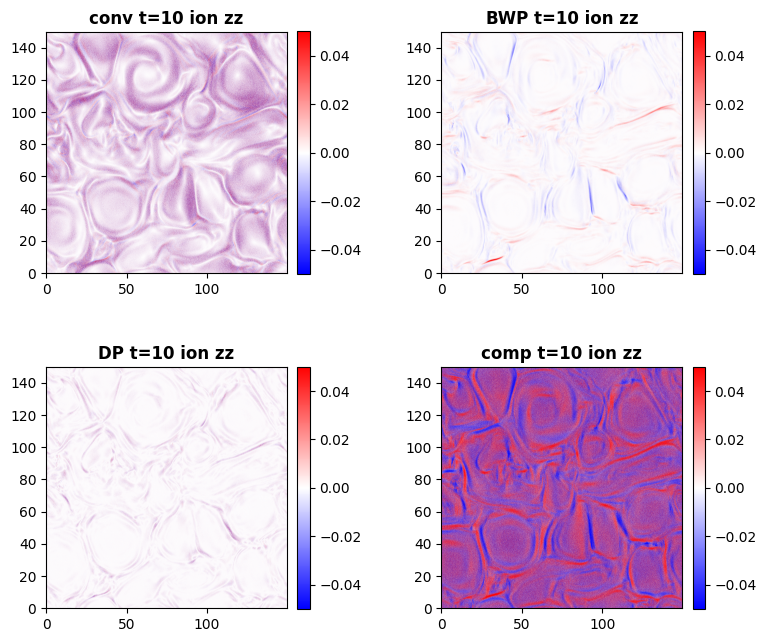

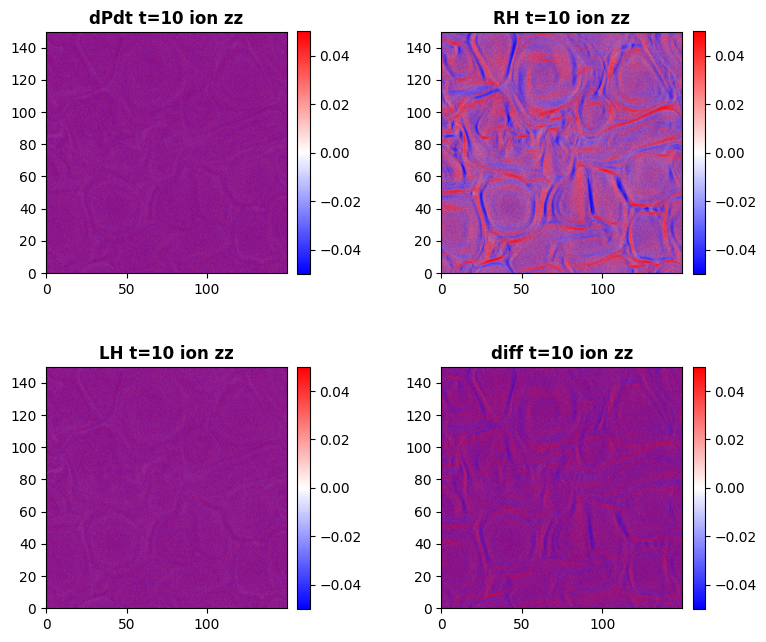

In [21]:
fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(conv10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('conv t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(BWP10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('BWP t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(DP10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('DP t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(comp10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('comp t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show


fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(dPdt10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('dPdt t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(RH10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('RH t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(LH10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('LH t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(diff10, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('diff t=10 %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show

In [27]:
print(len(dPdt10[0]), len(dPdt10[0:5]))

4096 5


In [ ]:
#make histogram of values (aka distribution plots)
#use hist2d, or flatten???
#basically figuring out how to plot the histogram/distribution of values

In [ ]:
#FOR THE AVG FILE LATER AFTER PLOTS...

with h5py.File("rhlh_terms_ion_xy.h5", "r") as f: #EDIT AS NAMED
    # read full array at timestep 0
    # conv0 = f["conv"][0, :, :]

    #with all timesteps:
    conv = f["conv"]
    BWP = f['BWP']
    DP = f['DP']
    comp = f['comp']

    # read a smaller subregion without loading the entire file
    # subregion = f["BWP"][10, 0:512, 0:512]

    # check shape
    # print(conv0.shape, convt.shape, len(convt))

    conv_out = np.zeros(conv.shape[1:], dtype=np.float64)
    BWP_out = np.zeros(conv.shape[1:], dtype=np.float64)
    DP_out = np.zeros(conv.shape[1:], dtype=np.float64)
    comp_out = np.zeros(conv.shape[1:], dtype=np.float64)

    for t in range(conv.shape[0]):     # loop over time axis
        conv_out += conv[t, :, :]          # adds one 4096x4096 slice at a time
        BWP_out += BWP[t, :, :]
        DP_out += DP[t, :, :]
        comp_out += comp[t, :, :]

# out now holds the time-sum, shape (4096, 4096)
print(conv_out.shape, conv_out.dtype)
print(BWP_out.shape, DP_out.shape, comp_out.shape)

In [22]:
conv_avg = conv_out / 119
BWP_avg = BWP_out / 119
DP_avg = DP_out / 119
comp_avg = comp_out / 119

#values are saved already

In [24]:
# save all these summed averaged vals in another h5py file; name like sumavg_vals

k = 1  # number of timesteps (change if needed)
ny, nx = 4096, 4096

with h5py.File("sumavg_vals_ion_xy.h5", "w") as f: #EDIT THIS
    f.create_dataset("conv", (k, ny, nx), dtype='float32',
                     chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    f.create_dataset("BWP",  (k, ny, nx), dtype='float32',
                     chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    f.create_dataset("DP",   (k, ny, nx), dtype='float32',
                     chunks=(1, 256, 256), compression="gzip", compression_opts=4)
    f.create_dataset("comp", (k, ny, nx), dtype='float32',
                     chunks=(1, 256, 256), compression="gzip", compression_opts=4)

with h5py.File("sumavg_vals_ion_xy.h5", "a") as f:  # "a" = append/update mode #EDIT THIS TOO
    f["conv"][0, :, :] = conv_avg.astype(np.float32)
    f["BWP"][0, :, :]  = BWP_avg.astype(np.float32)
    f["DP"][0, :, :]   = DP_avg.astype(np.float32)
    f["comp"][0, :, :] = comp_avg.astype(np.float32)


#checkpoint accomplished


In [ ]:
#next: dPdt but just w tf-ti.

Pfxx = load_p_ion(119, datalink)[:,:,0,1]
Pixx = load_p_ion(1, datalink)[:,:,0,1]

tf = dt * 119
ti = dt * 1

dPdt_avg = (Pfxx - Pixx) / (tf - ti)

In [13]:
import h5py

with h5py.File("sumavg_vals_ion_xy.h5", "r") as f: #EDIT THIS ACCORDINGLY
    # read full array at timestep 0
    # conv0 = f["conv"][0, :, :]

    #with all timesteps:
    conv_avg = np.squeeze(f["conv"])
    BWP_avg = np.squeeze(f['BWP'])
    DP_avg = np.squeeze(f['DP'])
    comp_avg = np.squeeze(f['comp'])

    print(BWP_avg.shape)


(4096, 4096)


In [26]:
RH_avg = BWP_avg + DP_avg + comp_avg
LH_avg = dPdt_avg + conv_avg
diff_avg = RH_avg-LH_avg

In [27]:
#Computing normalized diff

diffn1 = diff_avg / LH_avg
diffn2 = diff_avg / RH_avg
diffn3 = diff_avg / np.mean(diff_avg)
diffn4 = diff_avg / (LH_avg + RH_avg)


In [28]:
np.mean(diffn1), np.max(diffn1), np.min(diffn1)

(np.float64(-0.6307381449147978),
 np.float64(7448404.825013654),
 np.float64(-4886261.065590662))

<function matplotlib.pyplot.show(close=None, block=None)>

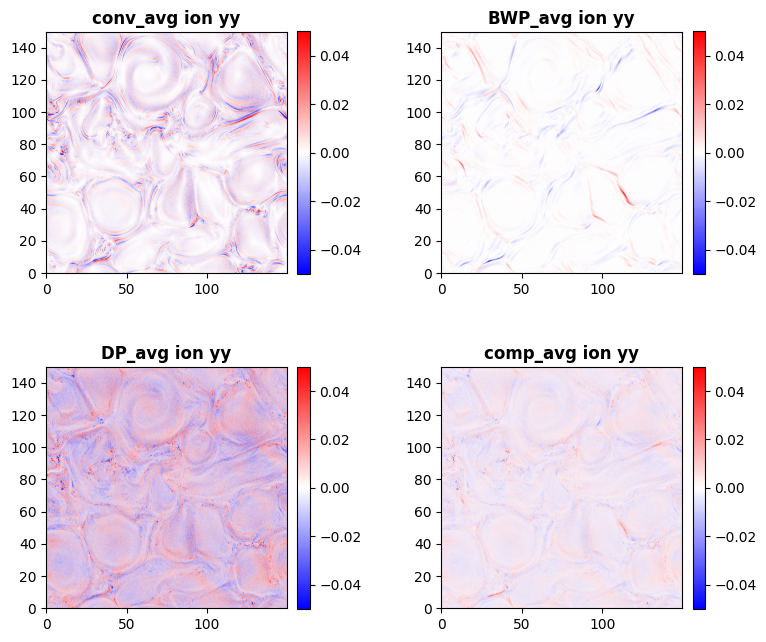

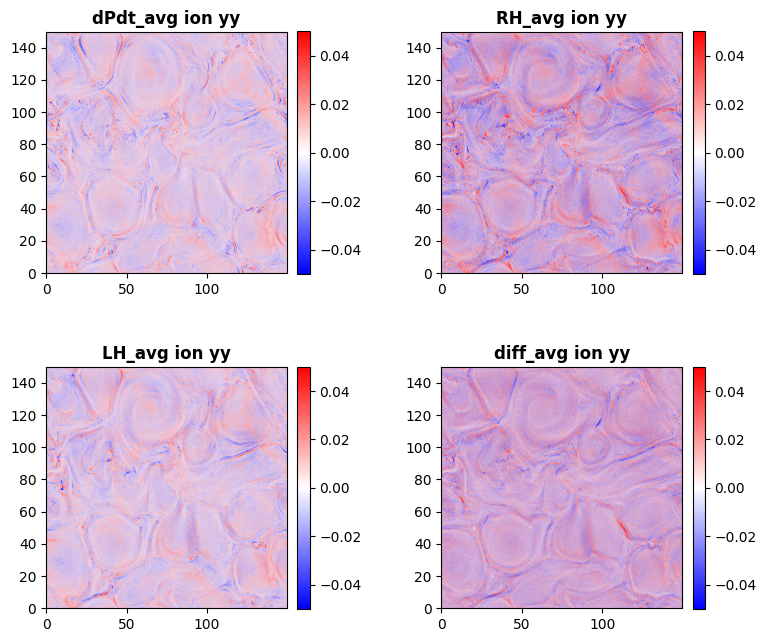

In [29]:
fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(conv_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('conv_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(BWP_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('BWP_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(DP_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('DP_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(comp_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('comp_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show


fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

im = ax[0,0].imshow(dPdt_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,0].set_title('dPdt_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(RH_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('RH_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(LH_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('LH_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(diff_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('diff_avg %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

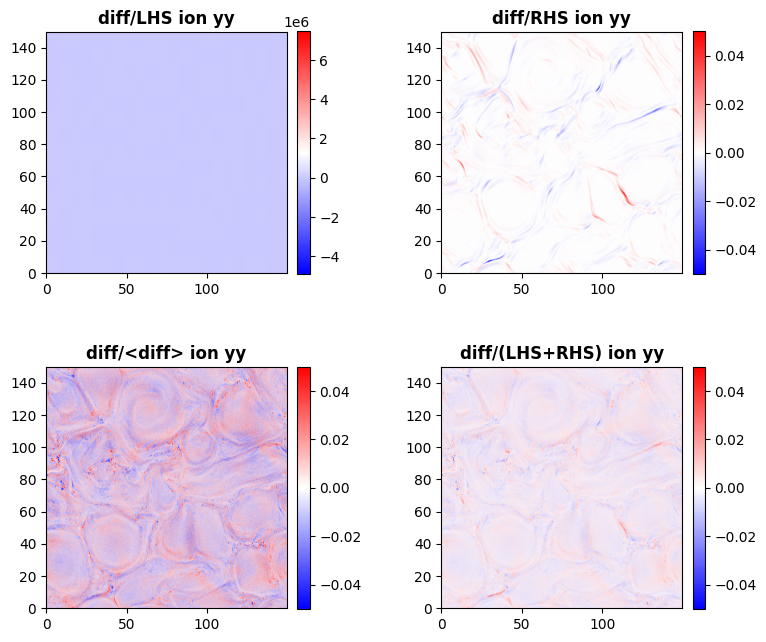

In [30]:
fig, ax = plt.subplots(2, 2, figsize=(8.5, 8.5))

# plt.suptitle('Normalized Time-Avged Differences')

im = ax[0,0].imshow(diffn1, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]])
ax[0,0].set_title('diff/LHS %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,0], fraction=0.046, pad=0.04)

im = ax[0,1].imshow(BWP_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[0,1].set_title('diff/RHS %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[0,1], fraction=0.046, pad=0.04)

im = ax[1,0].imshow(DP_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1,0].set_title('diff/<diff> %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,0], fraction=0.046, pad=0.04)

im = ax[1,1].imshow(comp_avg, origin = 'lower', cmap ='bwr', extent=[rc.xx[0], rc.xx[-1], rc.yy[0], rc.yy[-1]], vmin = -0.05, vmax = 0.05)
ax[1, 1].set_title('diff/(LHS+RHS) %s %s' % (part, component), fontweight = 'bold')
fig.colorbar(im, ax=ax[1,1], fraction=0.046, pad=0.04)

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.05) 

plt.show


In [ ]:
Quantify the differences!!!

Plot
LH, RH, differences. Also with indiv terms, work out max error
At one time slice, vs whole averaged. Quantify the difference

(make slides)

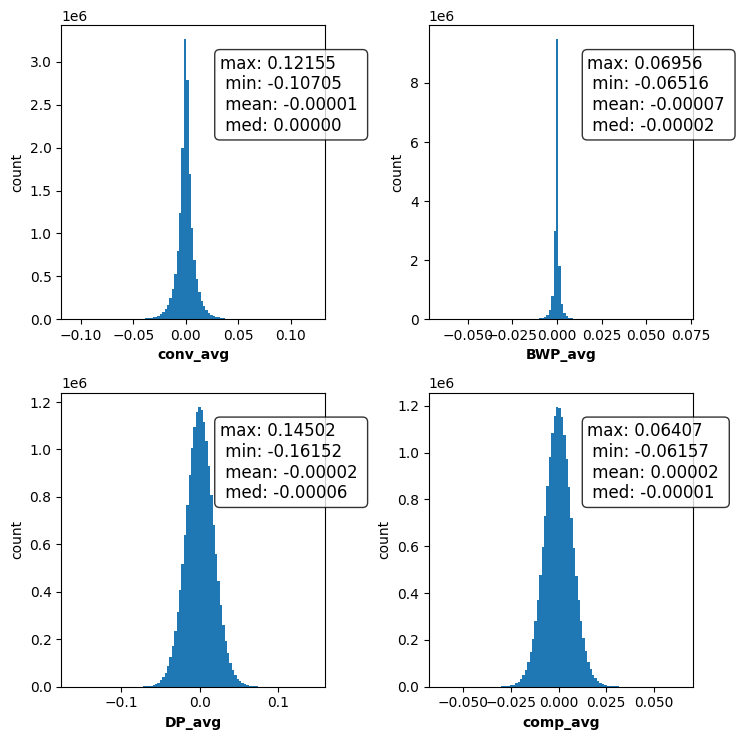

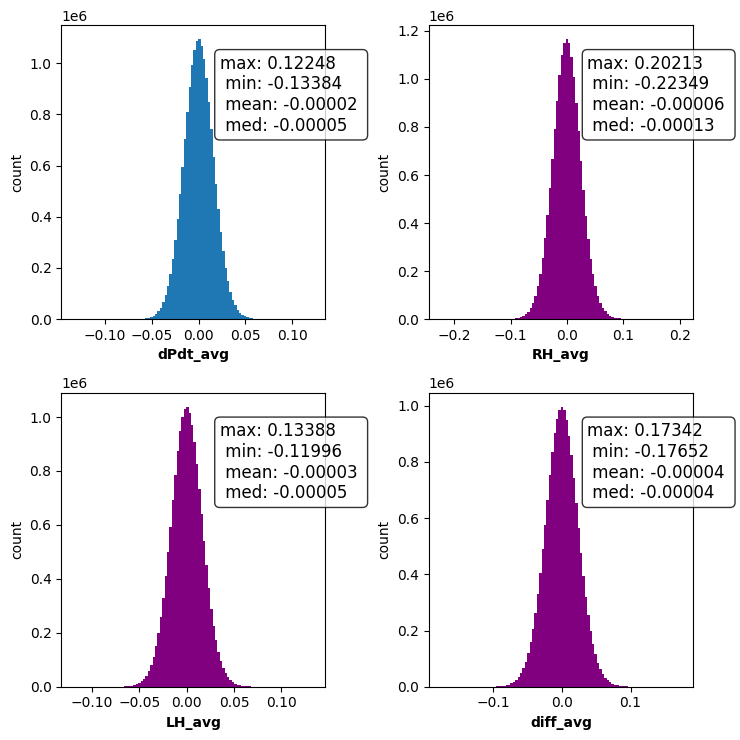

In [44]:
fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))

conv_r = conv_avg.ravel()

ax[0, 0].hist(conv_r, bins = 100)
ax[0, 0].set_xlabel("conv_avg", fontweight = 'bold')
ax[0, 0].set_ylabel("count")

maxv = np.max(conv_r)
minv = np.min(conv_r)
mean = np.mean(conv_r)
med = np.median(conv_r)

ax[0, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

BWP_r = BWP_avg.ravel()
ax[0, 1].hist(BWP_r, bins = 100)
ax[0, 1].set_xlabel("BWP_avg", fontweight = 'bold')
ax[0, 1].set_ylabel("count")

maxv = np.max(BWP_r)
minv = np.min(BWP_r)
mean = np.mean(BWP_r)
med = np.median(BWP_r)

ax[0, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

DP_r = DP_avg.ravel()
ax[1, 0].hist(DP_r, bins = 100)
ax[1, 0].set_xlabel("DP_avg", fontweight = 'bold')
ax[1, 0].set_ylabel("count")

maxv = np.max(DP_r)
minv = np.min(DP_r)
mean = np.mean(DP_r)
med = np.median(DP_r)

ax[1, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


comp_r = comp_avg.ravel()
ax[1, 1].hist(comp_r, bins = 100)
ax[1, 1].set_xlabel("comp_avg", fontweight = 'bold')
ax[1, 1].set_ylabel("count")

maxv = np.max(comp_r)
minv = np.min(comp_r)
mean = np.mean(comp_r)
med = np.median(comp_r)

ax[1, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


plt.tight_layout()
plt.show


fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))

dPdt_r = dPdt_avg.ravel()

ax[0, 0].hist(dPdt_r, bins = 100)
ax[0, 0].set_xlabel("dPdt_avg", fontweight = 'bold')
ax[0, 0].set_ylabel("count")

maxv = np.max(dPdt_r)
minv = np.min(dPdt_r)
mean = np.mean(dPdt_r)
med = np.median(dPdt_r)

ax[0, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

RH_r = RH_avg.ravel()
ax[0, 1].hist(RH_r, bins = 100, color = 'purple')
ax[0, 1].set_xlabel("RH_avg", fontweight = 'bold')
ax[0, 1].set_ylabel("count")

maxv = np.max(RH_r)
minv = np.min(RH_r)
mean = np.mean(RH_r)
med = np.median(RH_r)

ax[0, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

LH_r = LH_avg.ravel()
ax[1, 0].hist(LH_r, bins = 100, color = 'purple')
ax[1, 0].set_xlabel("LH_avg", fontweight = 'bold')
ax[1, 0].set_ylabel("count")

maxv = np.max(LH_r)
minv = np.min(LH_r)
mean = np.mean(LH_r)
med = np.median(LH_r)

ax[1, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

diff_r = diff_avg.ravel()
ax[1, 1].hist(diff_r, bins = 100, color = 'purple')
ax[1, 1].set_xlabel("diff_avg", fontweight = 'bold')
ax[1, 1].set_ylabel("count")

maxv = np.max(diff_r)
minv = np.min(diff_r)
mean = np.mean(diff_r)
med = np.median(diff_r)

ax[1, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()


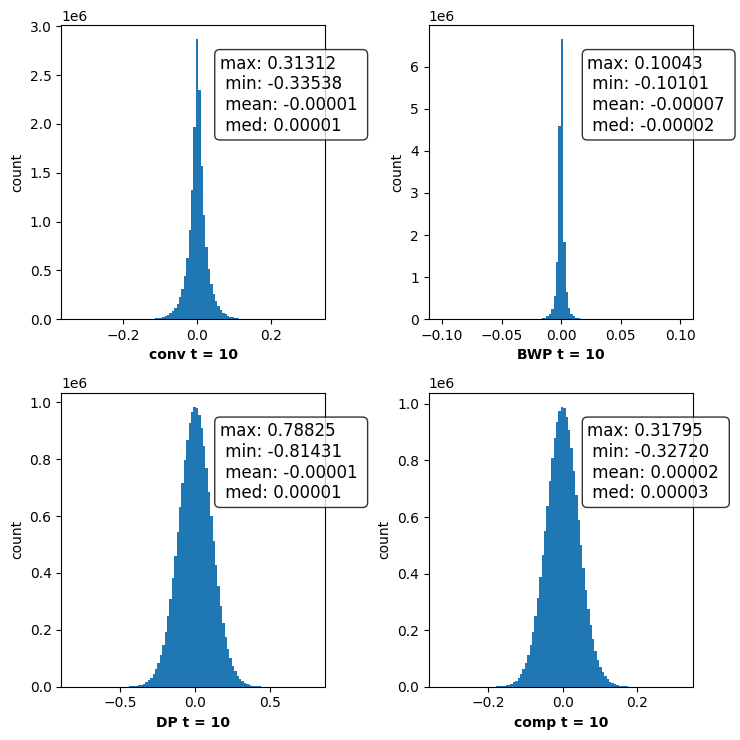

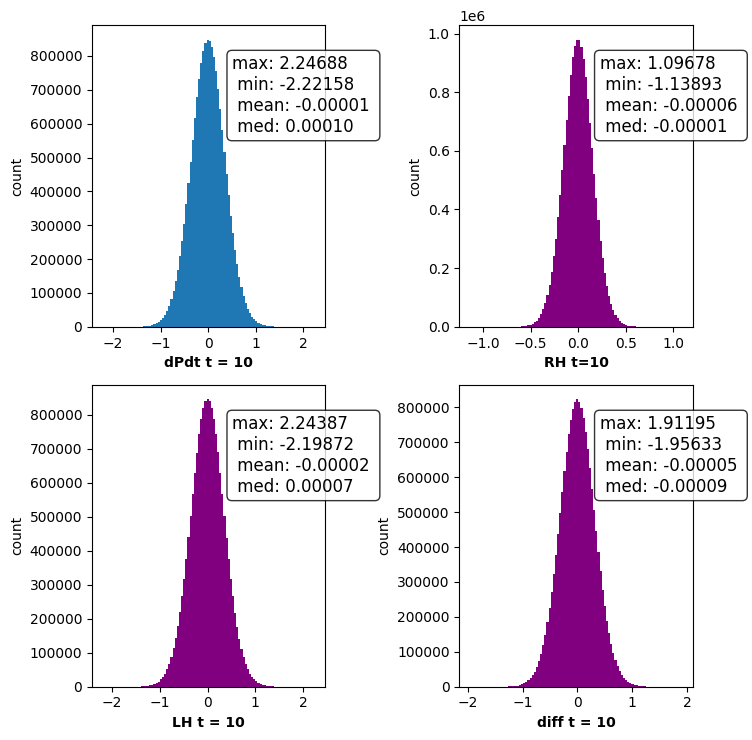

In [45]:
fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))

conv_r = conv10.ravel()

ax[0, 0].hist(conv_r, bins = 100)
ax[0, 0].set_xlabel("conv t = 10", fontweight = 'bold')
ax[0, 0].set_ylabel("count")

maxv = np.max(conv_r)
minv = np.min(conv_r)
mean = np.mean(conv_r)
med = np.median(conv_r)

ax[0, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

BWP_r = BWP10.ravel()
ax[0, 1].hist(BWP_r, bins = 100)
ax[0, 1].set_xlabel("BWP t = 10", fontweight = 'bold')
ax[0, 1].set_ylabel("count")

maxv = np.max(BWP_r)
minv = np.min(BWP_r)
mean = np.mean(BWP_r)
med = np.median(BWP_r)

ax[0, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

DP_r = DP10.ravel()
ax[1, 0].hist(DP_r, bins = 100)
ax[1, 0].set_xlabel("DP t = 10", fontweight = 'bold')
ax[1, 0].set_ylabel("count")

maxv = np.max(DP_r)
minv = np.min(DP_r)
mean = np.mean(DP_r)
med = np.median(DP_r)

ax[1, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


comp_r = comp10.ravel()
ax[1, 1].hist(comp_r, bins = 100)
ax[1, 1].set_xlabel("comp t = 10", fontweight = 'bold')
ax[1, 1].set_ylabel("count")

maxv = np.max(comp_r)
minv = np.min(comp_r)
mean = np.mean(comp_r)
med = np.median(comp_r)

ax[1, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)


plt.tight_layout()
plt.show


fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))

dPdt_r = dPdt10.ravel()

ax[0, 0].hist(dPdt_r, bins = 100)
ax[0, 0].set_xlabel("dPdt t = 10", fontweight = 'bold')
ax[0, 0].set_ylabel("count")

maxv = np.max(dPdt_r)
minv = np.min(dPdt_r)
mean = np.mean(dPdt_r)
med = np.median(dPdt_r)

ax[0, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

RH_r = RH10.ravel()
ax[0, 1].hist(RH_r, bins = 100, color = 'purple')
ax[0, 1].set_xlabel("RH t=10", fontweight = 'bold')
ax[0, 1].set_ylabel("count")

maxv = np.max(RH_r)
minv = np.min(RH_r)
mean = np.mean(RH_r)
med = np.median(RH_r)

ax[0, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

LH_r = LH10.ravel()
ax[1, 0].hist(LH_r, bins = 100, color = 'purple')
ax[1, 0].set_xlabel("LH t = 10", fontweight = 'bold')
ax[1, 0].set_ylabel("count")

maxv = np.max(LH_r)
minv = np.min(LH_r)
mean = np.mean(LH_r)
med = np.median(LH_r)

ax[1, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

diff_r = diff10.ravel()
ax[1, 1].hist(diff_r, bins = 100, color = 'purple')
ax[1, 1].set_xlabel("diff t = 10", fontweight = 'bold')
ax[1, 1].set_ylabel("count")

maxv = np.max(diff_r)
minv = np.min(diff_r)
mean = np.mean(diff_r)
med = np.median(diff_r)

ax[1, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[1, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

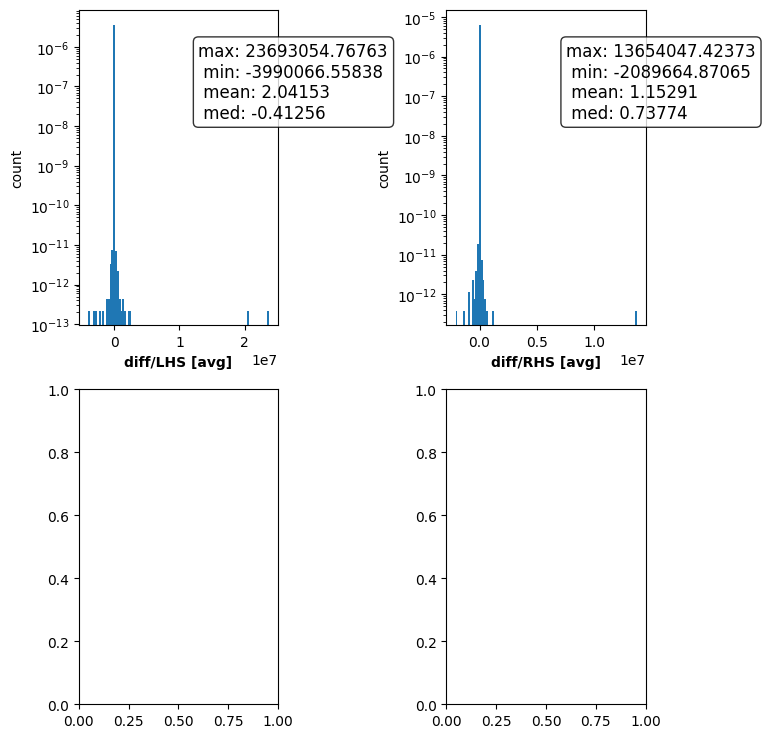

In [38]:
fig, ax = plt.subplots(2, 2, figsize=(7.5, 7.5))

d1_r = diffn1.ravel()

ax[0, 0].hist(d1_r, bins = 100, density = True)
ax[0, 0].set_xlabel("diff/LHS [avg]", fontweight = 'bold')
ax[0, 0].set_ylabel("count")

maxv = np.max(d1_r)
minv = np.min(d1_r)
mean = np.mean(d1_r)
med = np.median(d1_r)
std_dev = np.std(d1_r)

x = np.linspace(min(d1_r), max(d1_r), len(d1_r))

ax[0, 0].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 0].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# pdf = norm.pdf(x, loc=mean, scale=std_dev)

# ax[0,0].plot(x, pdf, color = 'grey', linestyle='--')

# ax[0,0].plot(x, norm.pdf(x, loc = mean, scale = std_dev))


ax[0,0].set_yscale('log')


d2_r = diffn2.ravel()

ax[0, 1].hist(d2_r, bins = 100, density = True)
ax[0, 1].set_xlabel("diff/RHS [avg]", fontweight = 'bold')
ax[0, 1].set_ylabel("count")

maxv = np.max(d2_r)
minv = np.min(d2_r)
mean = np.mean(d2_r)
med = np.median(d2_r)
std_dev = np.std(d2_r)

x = np.linspace(min(d2_r), max(d2_r), len(d2_r))

ax[0, 1].text(
    0.6, 0.9, f"max: {maxv:.5f}\n min: {minv:.5f} \n mean: {mean:.5f} \n med: {med:.5f} ",
    transform=ax[0, 1].transAxes,   # position relative to the axes
    ha='left', va='top',
    fontsize=12,
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

# pdf = norm.pdf(x, loc=mean, scale=std_dev)

# ax[0,0].plot(x, pdf, color = 'grey', linestyle='--')

# ax[0,1].plot(x, norm.pdf(x, loc = mean, scale = std_dev))


ax[0,1].set_yscale('log')

plt.tight_layout()
plt.show

In [ ]:
#10,9: read yan's notes; that has fuller equation in kinetic form. 

#10/13
#try more spatial resolution difference, not just in time(?) (though i did that with 4096)

#do quantitative comparison of errors

#distribution of values? and differences

#mismatched time scales? compressions?

#try computing for each term 
#the issue with the 1024 was that C was noisy
#filtering; higher order statistics; low pass filtering with addressing noise in divergence in velocity

#see the filtering papers 

#colby's 2017 PoP paper. eg fig.7 (email)

#where high values are coming from; plotting seperately

#issue with time derivative keeping up with other terms--hence the difference

#results to 


#numerics under control; what terms -- departure from CGL eg heat conduction, look at yan's notes. dont rely only on pictures--also look at 1d distributions
#like pdfs, spatial sep relating diff quantitites


#compute measures of anisotropy like ratios;; which are to the time derivative

#some terms gyrotropizing 

#when im done calculating things correctly, measure terms in anisotropy. 